In [1]:
import numpy as np
import pandas as pd 
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/sf-crime/train.csv.zip
/kaggle/input/sf-crime/sampleSubmission.csv.zip
/kaggle/input/sf-crime/test.csv.zip


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
train = pd.read_csv('/kaggle/input/sf-crime/train.csv.zip', parse_dates=['Dates'])
test = pd.read_csv('/kaggle/input/sf-crime/test.csv.zip', parse_dates=['Dates'], index_col = 'Id')
samSub = pd.read_csv('/kaggle/input/sf-crime/sampleSubmission.csv.zip')

In [4]:
train.head(2)

,Dates,Category,Descript,DayOfWeek,PdDistrict,Resolution,Address,X,Y
0,2015-05-13 23:53:00,WARRANTS,WARRANT ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,OTHER OFFENSES,TRAFFIC VIOLATION ARREST,Wednesday,NORTHERN,"ARREST, BOOKED",OAK ST / LAGUNA ST,-122.425892,37.774599


In [5]:
test.head(2)

,Dates,DayOfWeek,PdDistrict,Address,X,Y
Id,,,,,,
0,2015-05-10 23:59:00,Sunday,BAYVIEW,2000 Block of THOMAS AV,-122.399588,37.735051
1,2015-05-10 23:51:00,Sunday,BAYVIEW,3RD ST / REVERE AV,-122.391523,37.732432


In [6]:
a = list(test)
train_data = train[a]
main = pd.concat([train_data, test])
main.head(3)
df = main.copy()
df.head()

,Dates,DayOfWeek,PdDistrict,Address,X,Y
0,2015-05-13 23:53:00,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599
1,2015-05-13 23:53:00,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599
2,2015-05-13 23:33:00,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414
3,2015-05-13 23:30:00,Wednesday,NORTHERN,1500 Block of LOMBARD ST,-122.426995,37.800873
4,2015-05-13 23:30:00,Wednesday,PARK,100 Block of BRODERICK ST,-122.438738,37.771541


# > **Lets seperate the target Columnns**

In [7]:
tar = train['Category']
tar.head()

0          WARRANTS
1    OTHER OFFENSES
2    OTHER OFFENSES
3     LARCENY/THEFT
4     LARCENY/THEFT
Name: Category, dtype: object

In [8]:
df.isnull().sum()

Dates         0
DayOfWeek     0
PdDistrict    0
Address       0
X             0
Y             0
dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder
LB = LabelEncoder()
target = LB.fit_transform(tar)
print(LB.classes_)
temp = pd.DataFrame(tar, target)
temp.head(3)

['ARSON' 'ASSAULT' 'BAD CHECKS' 'BRIBERY' 'BURGLARY' 'DISORDERLY CONDUCT'
 'DRIVING UNDER THE INFLUENCE' 'DRUG/NARCOTIC' 'DRUNKENNESS'
 'EMBEZZLEMENT' 'EXTORTION' 'FAMILY OFFENSES' 'FORGERY/COUNTERFEITING'
 'FRAUD' 'GAMBLING' 'KIDNAPPING' 'LARCENY/THEFT' 'LIQUOR LAWS' 'LOITERING'
 'MISSING PERSON' 'NON-CRIMINAL' 'OTHER OFFENSES'
 'PORNOGRAPHY/OBSCENE MAT' 'PROSTITUTION' 'RECOVERED VEHICLE' 'ROBBERY'
 'RUNAWAY' 'SECONDARY CODES' 'SEX OFFENSES FORCIBLE'
 'SEX OFFENSES NON FORCIBLE' 'STOLEN PROPERTY' 'SUICIDE' 'SUSPICIOUS OCC'
 'TREA' 'TRESPASS' 'VANDALISM' 'VEHICLE THEFT' 'WARRANTS' 'WEAPON LAWS']


,Category
37,LARCENY/THEFT
21,ROBBERY
21,ROBBERY


In [10]:
date = pd.to_datetime(main['Dates'])
df['Date'] = date.dt.date
df['Year'] = date.dt.year
df['Month'] = date.dt.month
df['Day'] = date.dt.day
df['Hour'] = date.dt.hour
df.drop('Dates', axis = 1, inplace = True)

In [11]:
df.head(3)

,DayOfWeek,PdDistrict,Address,X,Y,Date,Year,Month,Day,Hour
0,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13,2015,5,13,23
1,Wednesday,NORTHERN,OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13,2015,5,13,23
2,Wednesday,NORTHERN,VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015-05-13,2015,5,13,23


In [12]:
date = df.groupby('Date').count().iloc[:, 0]

Text(389.0, 0.005, 'Median389.0')

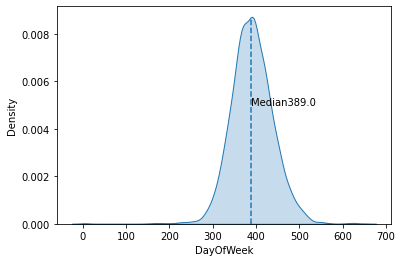

In [13]:
sns.kdeplot(data = date, shade = True)
plt.axvline(x = date.median(), ymax = 0.95, linestyle = '--')
plt.annotate('Median' + str(date.median()), xy = (date.median(), 0.005))

The number of crimes per day has a normal distribution, with a median of 389.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='PdDis', ylabel='count'>

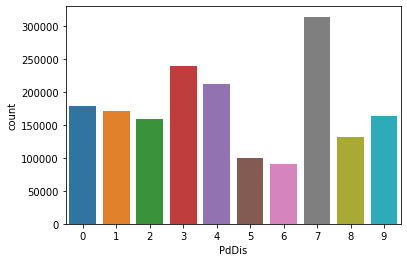

In [14]:
lb = LabelEncoder()
df['PdDis'] = lb.fit_transform(df['PdDistrict'])
sns.countplot(df['PdDis'])

In [15]:
df[['PdDistrict', 'PdDis']].head(10)

,PdDistrict,PdDis
0,NORTHERN,4
1,NORTHERN,4
2,NORTHERN,4
3,NORTHERN,4
4,PARK,5
5,INGLESIDE,2
6,INGLESIDE,2
7,BAYVIEW,0
8,RICHMOND,6
9,CENTRAL,1


In [16]:
df.drop('PdDistrict', axis = 1, inplace = True)

In [17]:
df.head(3)

,DayOfWeek,Address,X,Y,Date,Year,Month,Day,Hour,PdDis
0,Wednesday,OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13,2015,5,13,23,4
1,Wednesday,OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13,2015,5,13,23,4
2,Wednesday,VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015-05-13,2015,5,13,23,4


In [18]:
df['DayWeek'] = lb.fit_transform(df['DayOfWeek'])
df[['DayOfWeek', 'DayWeek']].head(10)

,DayOfWeek,DayWeek
0,Wednesday,6
1,Wednesday,6
2,Wednesday,6
3,Wednesday,6
4,Wednesday,6
5,Wednesday,6
6,Wednesday,6
7,Wednesday,6
8,Wednesday,6
9,Wednesday,6


In [19]:
df.drop('DayOfWeek', axis = 1, inplace = True)

In [20]:
df.head(3)

,Address,X,Y,Date,Year,Month,Day,Hour,PdDis,DayWeek
0,OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13,2015,5,13,23,4,6
1,OAK ST / LAGUNA ST,-122.425892,37.774599,2015-05-13,2015,5,13,23,4,6
2,VANNESS AV / GREENWICH ST,-122.424363,37.800414,2015-05-13,2015,5,13,23,4,6


In [21]:
df['Block'] = df['Address'].str.contains('block', case = False)
df['ST'] = df['Address'].str.contains('ST', case = False)
df.drop('Address', axis = 1, inplace = True)

In [22]:
df['Block'] = lb.fit_transform(df['Block'])
df['ST'] = lb.fit_transform(df['ST'])

In [23]:
df.head()

,X,Y,Date,Year,Month,Day,Hour,PdDis,DayWeek,Block,ST
0,-122.425892,37.774599,2015-05-13,2015,5,13,23,4,6,0,1
1,-122.425892,37.774599,2015-05-13,2015,5,13,23,4,6,0,1
2,-122.424363,37.800414,2015-05-13,2015,5,13,23,4,6,0,1
3,-122.426995,37.800873,2015-05-13,2015,5,13,23,4,6,1,1
4,-122.438738,37.771541,2015-05-13,2015,5,13,23,5,6,1,1


In [24]:
print(df['X'].min(), df['X'].max())
print(df['Y'].min(), df['Y'].max())

-122.51364206429 -120.5
37.7078790224135 90.0


In [25]:
medX = df[df['X'] < -120.5]['X'].median()
medY = df[df['Y'] < 90]['Y'].median()
df.loc[df['X'] >= -120.5, 'X'] = medX
df.loc[df['Y'] >= 90, 'Y'] = medY

In [26]:
df['X+Y'] = df['X'] + df['Y']
df['X-Y'] = df['X'] - df['Y']

In [27]:
df.drop('Date', axis = 1, inplace = True)

In [28]:
data_train = df[:train.shape[0]]
data_test = df[train.shape[0]:]
data_train.head()

,X,Y,Year,Month,Day,Hour,PdDis,DayWeek,Block,ST,X+Y,X-Y
0,-122.425892,37.774599,2015,5,13,23,4,6,0,1,-84.651293,-160.200490
1,-122.425892,37.774599,2015,5,13,23,4,6,0,1,-84.651293,-160.200490
2,-122.424363,37.800414,2015,5,13,23,4,6,0,1,-84.623949,-160.224777
3,-122.426995,37.800873,2015,5,13,23,4,6,1,1,-84.626123,-160.227868
4,-122.438738,37.771541,2015,5,13,23,5,6,1,1,-84.667196,-160.210279


In [29]:
import lightgbm as lg
trains = lg.Dataset(data_train, label = target, categorical_feature=['PdDis', 'DayWeek'])
params = {
    'boosting':'gbdt',
    'objective':'multiclass',
    'num_class':39,
    'max_delta_step':0.9,
    'min_data_in_leaf': 20,
    'learning_rate': 0.4,
    'max_bin': 480,
    'num_leaves': 45,
    'verbose' : 1
}
bst = lg.train(params, trains, 120)

/opt/conda/lib/python3.7/site-packages/lightgbm/basic.py:1702: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')


[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.040237 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2026
[LightGBM] [Info] Number of data points in the train set: 878049, number of used features: 12
[LightGBM] [Info] Start training from score -6.363608
[LightGBM] [Info] Start training from score -2.435509
[LightGBM] [Info] Start training from score -7.679105
[LightGBM] [Info] Start training from score -8.019031
[LightGBM] [Info] Start training from score -3.173428
[LightGBM] [Info] Start training from score -5.314447
[LightGBM] [Info] Start training from score -5.958804
[LightGBM] [Info] Start training from score -2.789256
[LightGBM] [Info] Start training from score -5.323749
[LightGBM] [Info] Start training from score -6.624123
[LightGBM] [Info] Start training from score -8.140280
[LightGBM] [Info] Start training from score -7.48

In [30]:
prediction = bst.predict(data_test)

In [31]:
result1 = pd.DataFrame(prediction, columns = LB.inverse_transform(np.linspace(0, 38, 39, dtype='int16')),index=data_test.index) 
result1.head()
result1.to_csv('submission-1', index_label = 'Id')